In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
x= np.random.rand(100).astype(np.float32)
x[:10]

array([0.96773887, 0.23315986, 0.1745298 , 0.8064695 , 0.65853304,
       0.8848993 , 0.06730571, 0.35869357, 0.3699313 , 0.12377018],
      dtype=float32)

In [38]:
y= x*3 +2
y[:10]

array([4.9032164, 2.6994796, 2.5235894, 4.419409 , 3.975599 , 4.654698 ,
       2.2019172, 3.0760808, 3.109794 , 2.3713105], dtype=float32)

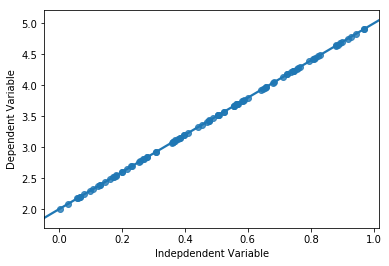

In [39]:
sns.regplot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [46]:
a= tf.Variable(1.0)
b= tf.Variable(0.2)
yhat= a*x + b

To find Loss's value, we use `tf.reduce_mean()`. This function finds the mean of a multidimensional tensor, and the result can have a diferent dimension.

In [47]:
loss= tf.reduce_mean(tf.square(yhat-y))

We use the `tf.train.GradientDescentOptimizer.minimize()` to minimize the error function of optimizer, resulting in a better model. Here we will use a simple gradient descent with a learning rate of 0.5

In [48]:
optimizer= tf.train.GradientDescentOptimizer(0.5)
train= optimizer.minimize(loss)

Don't forget to initialize the variables before executing a graph

In [49]:
init= tf.global_variables_initializer()

Now we are ready to start the optimization and run the graph

In [76]:
with tf.Session() as session:
    session.run(init)
    train_data=[]
    for i in range(100):
        evals= session.run([train,a,b])[1:]
        if(i%10==0):
            print(i , ": ", evals)
        train_data.append(evals)

0 :  [2.4832864, 2.9708323]
10 :  [2.5453043, 2.2336466]
20 :  [2.7426693, 2.1322298]
30 :  [2.8543663, 2.0748339]
40 :  [2.9175801, 2.0423515]
50 :  [2.9533553, 2.0239685]
60 :  [2.9736018, 2.0135648]
70 :  [2.9850602, 2.0076768]
80 :  [2.991545, 2.0043447]
90 :  [2.995215, 2.0024588]


In [80]:
yhat= x * train_data[99][0] + train_data[99][1]

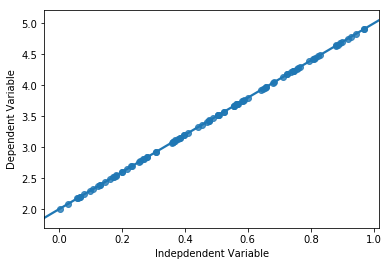

In [81]:
sns.regplot(x,yhat)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()